<a href="https://colab.research.google.com/github/GaneshPechetti/FML/blob/main/Ridge_MultiVarRegression_50Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
#Reading and Exploring data
data = pd.read_csv("/content/50_Startups.csv")
print(data.shape)
print()
print(data.info())
print(data.head())

(50, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [ ]:
#Ordinal Encoding

#from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()


mapper = {"New York":0,"California":1,"Florida":2}
data["State"] = data["State"].replace(mapper)
print(data.head())


   R&D Spend  Administration  Marketing Spend  State     Profit
0  165349.20       136897.80        471784.10      0  192261.83
1  162597.70       151377.59        443898.53      1  191792.06
2  153441.51       101145.55        407934.54      2  191050.39
3  144372.41       118671.85        383199.62      0  182901.99
4  142107.34        91391.77        366168.42      2  166187.94


In [ ]:
#checking for null values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
#checking correlation
data.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.037930,0.972900
Administration,0.241955,1.000000,-0.032154,0.003026,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.137777,0.747766
State,0.037930,0.003026,0.137777,1.000000,0.048471
Profit,0.972900,0.200717,0.747766,0.048471,1.000000


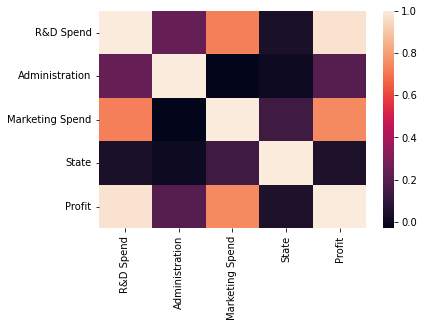

In [ ]:
sns.heatmap(data.corr())
plt.show()

In [ ]:
#preparing data columns with state column
X = data.drop("Profit",axis=1).values
y = data["Profit"].values

X_c = data.drop(["Profit","State"],axis=1).values
print(X_c.shape)


(50, 3)


In [ ]:
#reshaping y column
y = y.reshape(-1,1)
y.shape

(50, 1)

**With State Column**

---


In [ ]:
#preparing training data and spliting data with state column 
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)
print(train_X.shape,train_y.shape,test_X.shape,test_y.shape)

(40, 4) (40, 1) (10, 4) (10, 1)


In [ ]:
#preparing a model and training it
model = Ridge(alpha=0.1)
model.fit(train_X,train_y) #randomstate 18 comparatively less error

Ridge(alpha=0.1)

In [ ]:
#Evaluating the model on train data

pred_y = model.predict(train_X)
print(f"MAE : {mean_absolute_error(train_y,pred_y)}")
print(f"MSE : {mean_squared_error(train_y,pred_y)}")
print(f"RMSE : {mean_squared_error(train_y,pred_y)**0.5}")
print(f"R_2 : {r2_score(train_y,pred_y)}")

MAE : 6349.166179386533
MSE : 81574895.27841212
RMSE : 9031.882155919226
R_2 : 0.9501823850108506


In [ ]:
#Evaluating the model on test data

pred_y = model.predict(test_X)
print(pred_y.shape)
print(f"MAE : {mean_absolute_error(test_y,pred_y)}")
print(f"MSE : {mean_squared_error(test_y,pred_y)}")
print(f"RMSE : {mean_squared_error(test_y,pred_y)**0.5}")
print(f"R_2 : {r2_score(test_y,pred_y)}")

(10, 1)
MAE : 7511.498878885881
MSE : 83342327.754675
RMSE : 9129.201923206376
R_2 : 0.9348323749951539


In [ ]:
res = pd.DataFrame({"Actual value":test_y.flatten(),"Predicted value":pred_y.flatten(),"Difference":test_y.flatten()-pred_y.flatten()})
print(res.to_string())

   Actual value  Predicted value    Difference
0     103282.38    103086.942885    195.437115
1     144259.40    132500.389571  11759.010429
2     146121.95    132509.748584  13612.201416
3      77798.83     72048.161598   5750.668402
4     191050.39    178583.653150  12466.736850
5     105008.31    116191.512441 -11183.202441
6      81229.06     67897.521478  13331.538522
7      97483.56     98840.517195  -1356.957195
8     110352.25    114028.470898  -3676.220898
9     166187.94    167970.955522  -1783.015522


**Without State column**

---



In [ ]:
#preparing training data and spliting data without state column 

train_Xc,test_Xc,train_yc,test_yc = train_test_split(X_c,y,test_size=0.2,random_state=0)
print(train_Xc.shape,train_yc.shape,test_Xc.shape,test_yc.shape)

(40, 3) (40, 1) (10, 3) (10, 1)


In [ ]:
#preparing a model and training it

model2 = Ridge(alpha=0.1)
model2.fit(train_Xc,train_yc)

Ridge(alpha=0.1)

In [ ]:
#Evaluating the model on testing data

pred_y = model2.predict(train_Xc)
print(f"MAE : {mean_absolute_error(train_yc,pred_y)}")
print(f"MSE : {mean_squared_error(train_yc,pred_y)}")
print(f"RMSE : {mean_squared_error(train_yc,pred_y)**0.5}")
print(f"R_2 : {r2_score(train_yc,pred_y)}")

MAE : 6334.814095564907
MSE : 81943542.34370568
RMSE : 9052.267248800474
R_2 : 0.9499572530324031


In [ ]:
#Evaluating the model on testing data

pred_y = model2.predict(test_Xc)
print(f"MAE : {mean_absolute_error(test_yc,pred_y)}")
print(f"MSE : {mean_squared_error(test_yc,pred_y)}")
print(f"RMSE : {mean_squared_error(test_yc,pred_y)**0.5}")
print(f"R_2 : {r2_score(test_yc,pred_y)}")

MAE : 7320.4416148681075
MSE : 77506468.16938746
RMSE : 8803.775790499634
R_2 : 0.93939559178164
